САНКТ-ПЕТЕРБУРГСКИЙ ГОСУДАРСТВЕННЫЙ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ ИНФОРМАЦИОННЫХ ТЕХНОЛОГИЙ, МЕХАНИКИ И ОПТИКИ

# Лабораторная работа №3.   Дерево решений

Выполнили: Романовская Арина, Жихаревич Ирина<br>
Группа К3343

Проверила: Добренко Н. В.

#### Выбор предменой области и набора данных

Пациенты были впервые оценены клинически с 12 признаками. После этого были взяты образцы кожи для оценки 22 гистопатологических признаков. Значения гистопатологических признаков определяются путем анализа образцов под микроскопом.

В наборе данных, сконструированном для этого домена, особенность семейной истории имеет значение 1, если в семье наблюдалось какое-либо из этих заболеваний, и 0 в противном случае. Возрастная характеристика просто представляет возраст пациента. Каждому другому признаку (клиническому и гистопатологическому) присваивалась степень в диапазоне от 0 до 3. Здесь 0 указывает, что признак отсутствовал, 3 обозначает максимально возможное количество, а 1, 2 обозначает относительные промежуточные значения.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#### Подготовка данных

In [2]:
colnames=["erythema", "scaling","definite borders","itching","koebner phenomenon","polygonal papules",
           "follicular papules","oral mucosal involvement","knee and elbow involvement","scalp involvement",
           "family history, (0 or 1)","melanin incontinence","eosinophils in the infiltrate","PNL infiltrate",
           "fibrosis of the papillary dermis","exocytosis","acanthosis","hyperkeratosis","parakeratosis",
           "clubbing of the rete ridges","elongation of the rete ridges","thinning of the suprapapillary epidermis",
           "spongiform pustule","munro microabcess","focal hypergranulosis","disappearance of the granular layer",
           "vacuolisation and damage of basal layer", "spongiosis","saw-tooth appearance of retes",
           "follicular horn plug", "perifollicular parakeratosis","inflammatory monoluclear inflitrate", 
           "band-like infiltrate","Age", "target"]
dermoFrame = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data',
                         header=None)
dermoFrame.columns = colnames

In [3]:
dermoFrame.replace('?', np.nan, inplace=True)
dermoFrame=dermoFrame.dropna(axis=0)
dermoFrame.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,target
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
X = dermoFrame[dermoFrame.columns[0:34]] #data values
y = dermoFrame[dermoFrame.columns[34]]   #target value

#### Распределение по возрастным группам

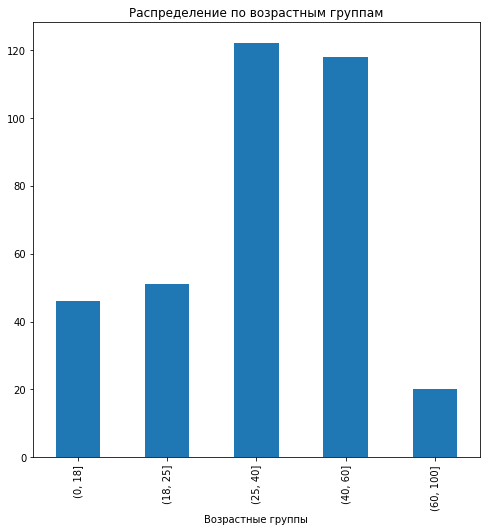

In [5]:
age_bin = [0,18,25,40,60,100] 

df=pd.DataFrame()
df['Возрастные группы'] = pd.cut(dermoFrame.Age.astype(int), 
                                 bins = age_bin)
groups = df.groupby(['Возрастные группы']).size()
groups.plot.bar( fontsize=10, figsize=(8, 8), 
                title="Распределение по возрастным группам")
plt.show()

#### Группировка на основе целевых значений

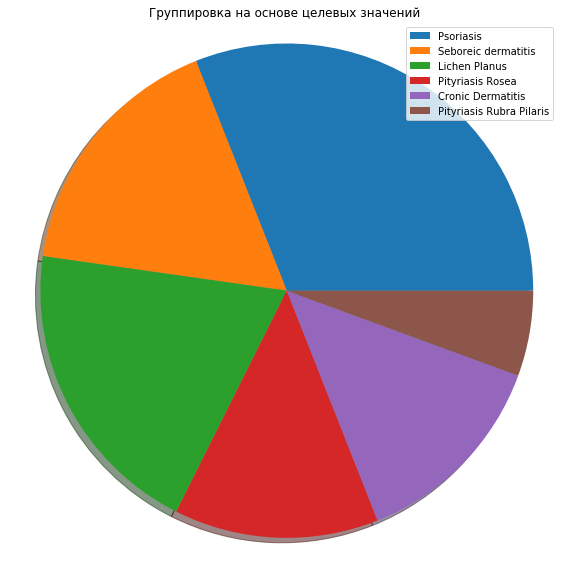

In [6]:
labels = ['Psoriasis', 'Seboreic dermatitis', 'Lichen Planus', 'Pityriasis Rosea',
          'Cronic Dermatitis','Pityriasis Rubra Pilaris']
plt.figure(figsize=(8, 8))
plt.title("Группировка на основе целевых значений")
patches, texts = plt.pie(dermoFrame.groupby(['target']).size(), shadow=True)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Разделим датасет на обучающую и тестовую выборки в отношении 80/20.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

Сначала обучим модель на обучающей выборке. Далее попробуем предсказать значение целевого признака по входным признакам для новых объектов с помощью метода predict.

In [8]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, model.predict(X_test))
print("Оценка точности: ", ac)

Оценка точности:  0.9583333333333334


#### Построение дерева решений

In [10]:
from sklearn.tree import export_graphviz
features = dermoFrame.columns[0:34]
target = dermoFrame.columns[34]
export_graphviz(model, out_file='dec_tree.dot', 
                feature_names=features, class_names=target)

In [16]:
estimator = DecisionTreeClassifier()
estimator.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
columns=["erythema", "scaling","definite borders","itching","koebner phenomenon","polygonal papules",
           "follicular papules","oral mucosal involvement","knee and elbow involvement","scalp involvement",
           "family history, (0 or 1)","melanin incontinence","eosinophils in the infiltrate","PNL infiltrate",
           "fibrosis of the papillary dermis","exocytosis","acanthosis","hyperkeratosis","parakeratosis",
           "clubbing of the rete ridges","elongation of the rete ridges","thinning of the suprapapillary epidermis",
           "spongiform pustule","munro microabcess","focal hypergranulosis","disappearance of the granular layer",
           "vacuolisation and damage of basal layer", "spongiosis","saw-tooth appearance of retes",
           "follicular horn plug","perifollicular parakeratosis","inflammatory monoluclear inflitrate", 
           "band-like infiltrate","Age"]

In [18]:
graph = Source(tree.export_graphviz(estimator, out_file=None, 
            feature_names=columns, filled = True))

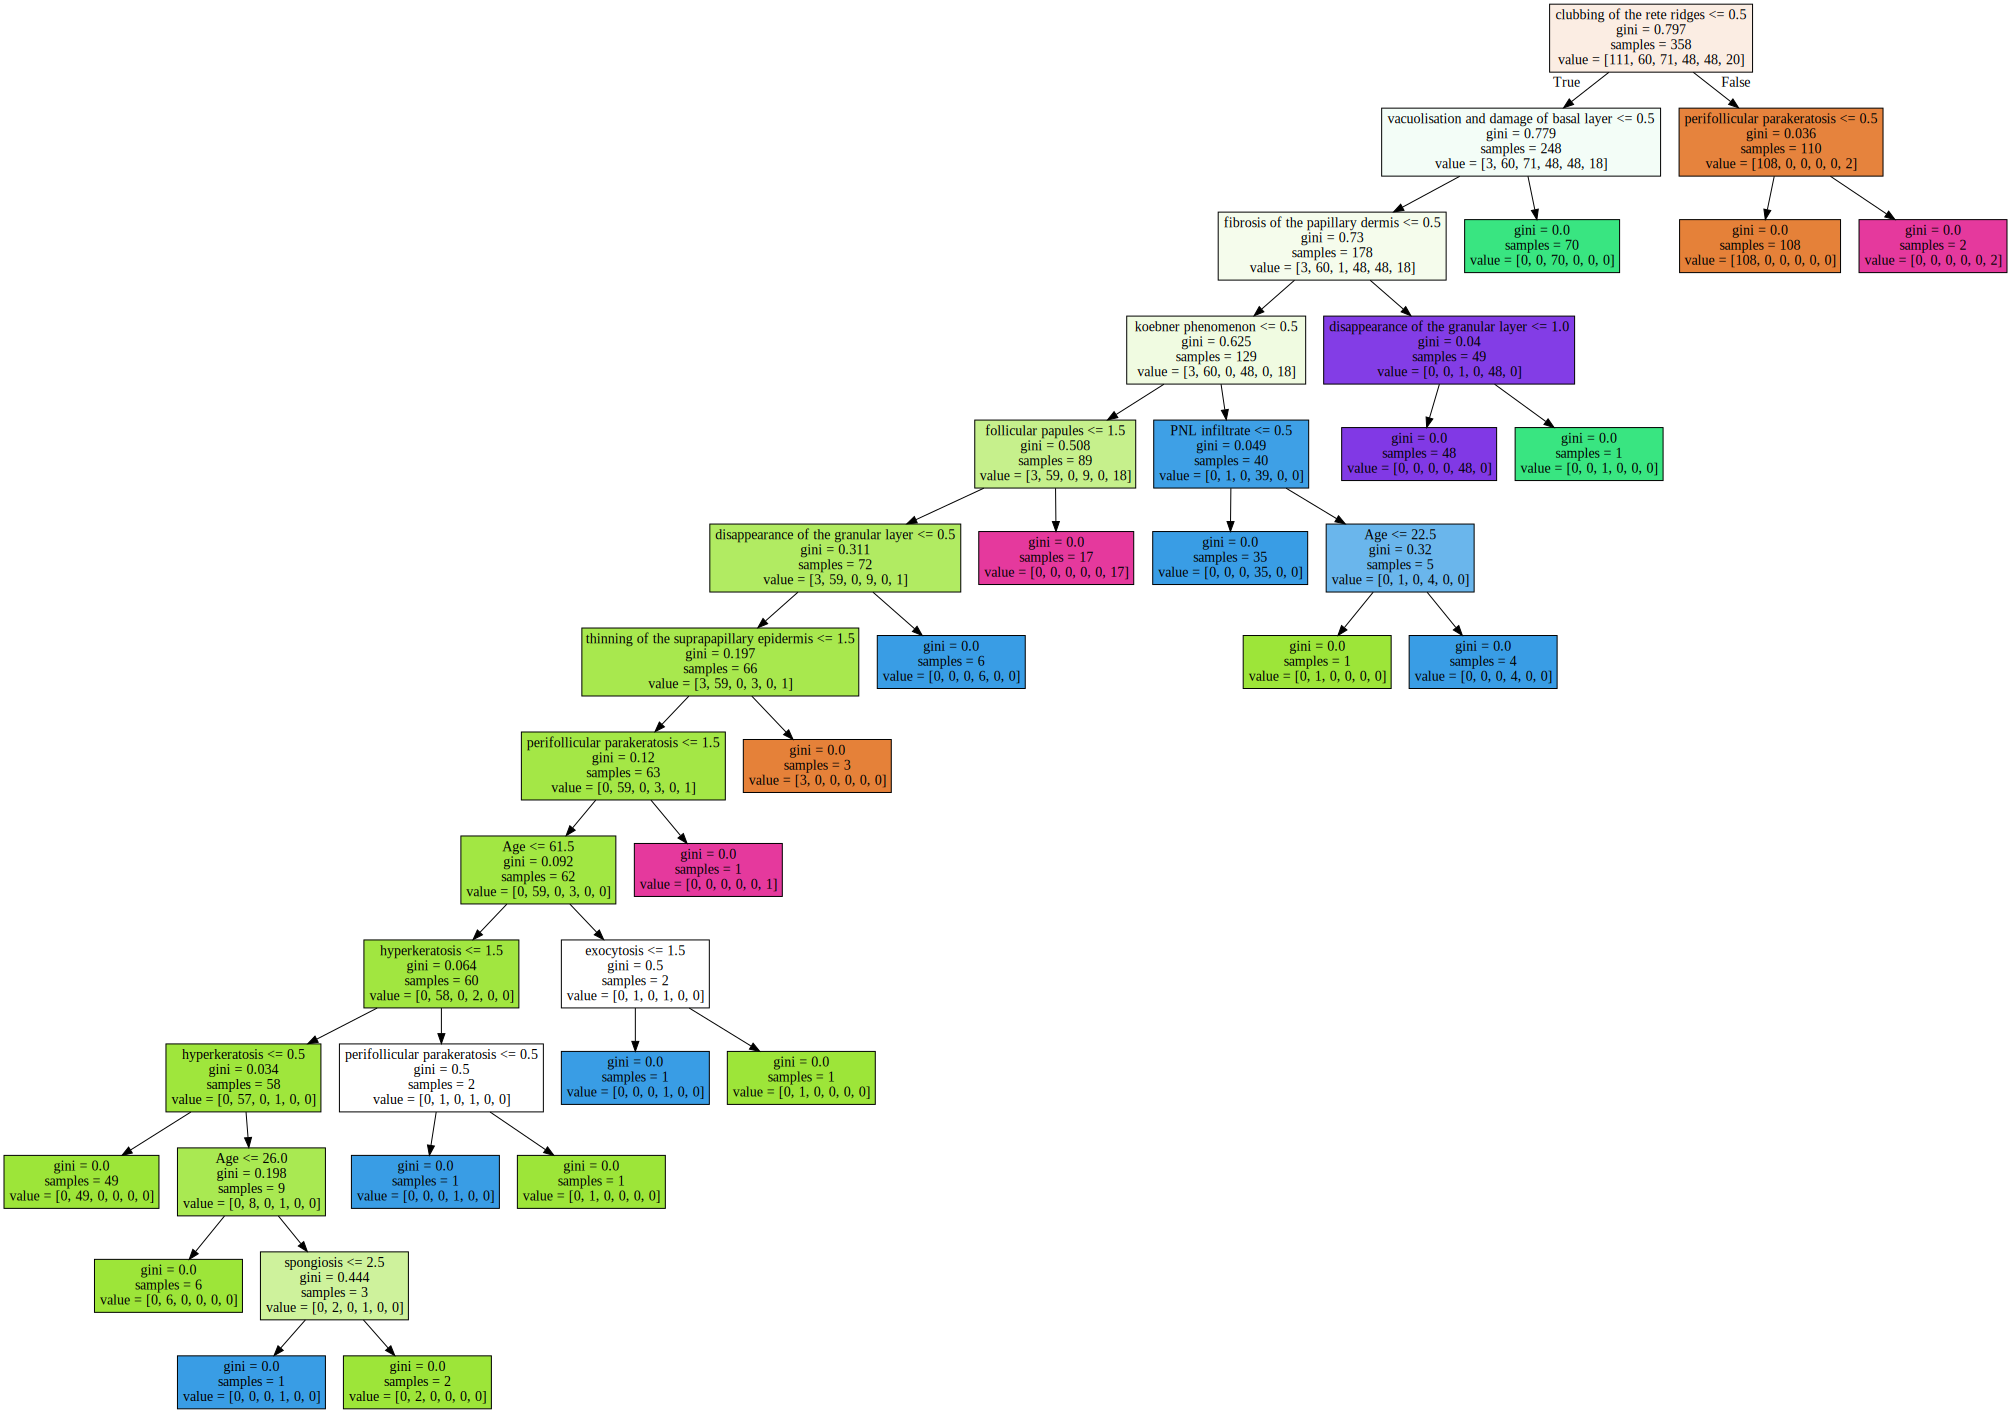

In [19]:
display(SVG(graph.pipe(format='svg')))

Выделим первые 5 уровней дерева, содержащие наиболее важные признаки. 

In [20]:
top = Source(tree.export_graphviz(estimator, out_file=None, 
            feature_names=columns, max_depth=5, filled = True))

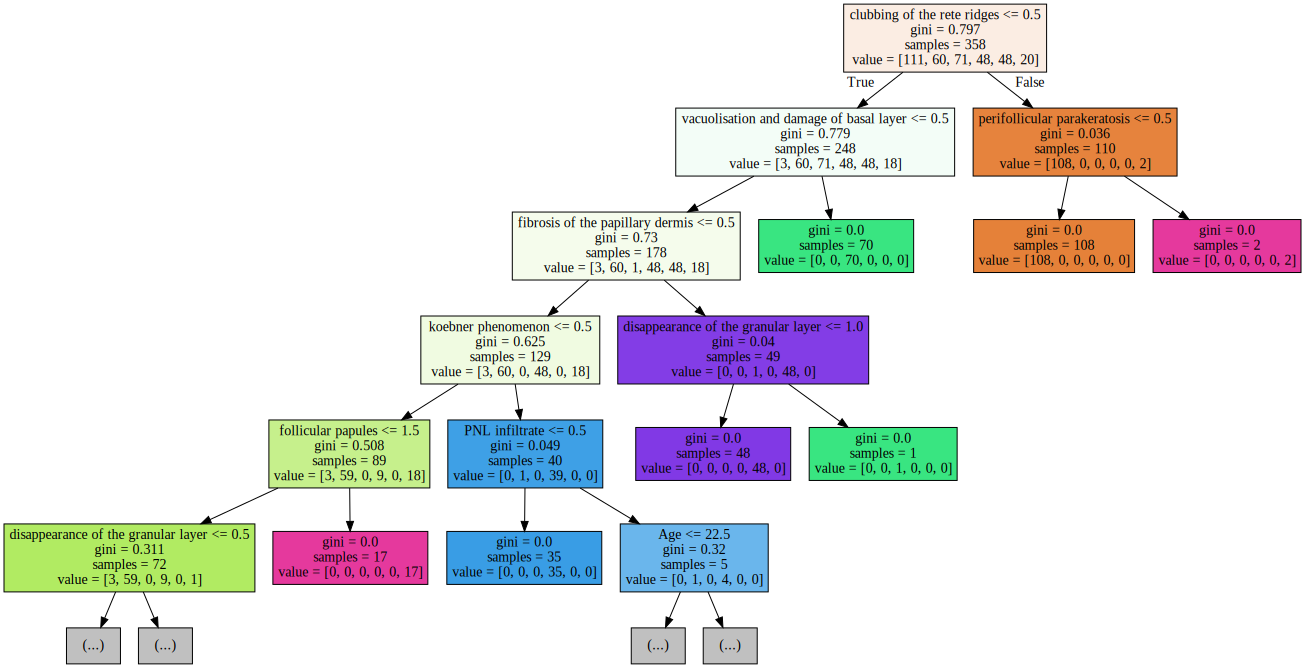

In [21]:
display(SVG(top.pipe(format='svg')))

#### Вывод

Дифференциальная диагностика эритематозно-плоскоклеточных заболеваний является реальной проблемой в дерматологии. Все они имеют общие клинические признаки эритемы и образования накипи, с очень небольшими различиями. Заболевания в этой группе: __псориаз, себорейный дерматит, красный плоский лишай, розоватый питариоз, хронический дерматит и рубиновый гриб__. Обычно для диагностики необходима биопсия, но, к сожалению, эти заболевания имеют много гистопатологических особенностей. Другая трудность для дифференциальной диагностики заключается в том, что заболевание может проявлять признаки другого заболевания на начальной стадии и может иметь характерные признаки на следующих этапах. Построенное дерево решений позоляет точнее диагностировать заболевания, основываясь на группах симптомов.